# Thuật toán phân cụm DBSCAN

**BS. Lê Ngọc Khả Nhi**

# Dẫn nhập

Phương pháp khai thác thông tin từ dữ liệu không có giám sát (Unsupervised learning) có những ứng dụng hữu ích không ngờ trong thực tiễn, đôi khi cùng một kỹ thuật phân cụm đơn giản có thể là giải pháp cho nhiều vấn đề tưởng như khác nhau hoặc rất phức tạp; phát hiện ra những quy luật phân nhóm và cấu trúc mà ta không ngờ, phân lập các ngoại lệ bất thường khỏi quần thể bình thường.


# Bài toán truy vết Covid tự động

Trong bối cảnh dịch Covid-19 vừa qua, chúng ta đã nghe nhiều về hoạt động truy vết những người từng có tiếp xúc với bệnh nhân F0. Quy trình này có thể được thực hiện tự động dựa vào dữ liệu về tọa độ của mỗi đối tượng, thí dụ qua GPS trên smartphone của họ, tại một thời điểm nhất định nào đó. Giả định ta có một bộ dữ liệu về tọa độ của 1000 người, mục tiêu là khi một đối tượng X có xét nghiệm dương tính với Covid, ta muốn phân lập tất cả những người gần đây đã có tiếp xúc với đối tượng này.

Bài toán này có thể được giải quyết bằng một thuật toán phân cụm là Density-Based Spatial Clustering of Applications with Noise (viết tắt: DBSCAN.

# Thuật toán DBSCAN

DBSCAN là một thuật toán phân cụm hiệu quả cao cho dữ liệu có cấu trúc phức tạp. Khác với thuật toán K-means chỉ dựa duy nhất vào khoảng cách, DDBSCAN vận hành bằng cách kết hợp 2 tham số là : bán kính phân cụm và số phần tử tối thiểu. Quy trình hoạt động của DBSCAN như sau:

Trên một tập dữ liệu gồm n phần tử, ta sẽ tuần tự khảo sát từng phần tử một.

Tại mỗi phần tử mục tiêu, ta ước tính khoảng cách từ phần tử đó đến tất cả những phần tử còn lại.

So sánh kết quả khoảng cách với giá trị bán kính phân cụm (neighborhood radius), tất cả những phần tử nào có khoảng cách nhỏ hơn bán kính này sẽ được xem như là láng giềng của phần tử mục tiêu. 

Kiểm tra số lượng phần tử láng giềng trong cụm này có thỏa tiêu chí số phần tử tối thiểu hay không. Phân cụm chỉ được thiết lập khi tiêu chí này được thỏa mãn, tất cả các điểm láng giềng xem như thuộc về 1 cụm.
Nếu tiêu chí này không thỏa, các điểm này sẽ được xem là nhiểu (noise).

Quy trình này lặp lại cho đến khi tất cả các phần tử đều được quy hoạch vào clusters, hoặc phân lập vào nhóm noise.

Như vậy, kết quả của thuật toán DBSCAN gồm có 1 nhãn đặc biệt gọi là Nhiễu (thường mang giá trị là -1), và k phân cụm, lưu ý là ta không ấn định trước giá trị của k, nhưng giá trị này tùy thuộc vào giá trị 2 tham số bán kính và số phần tử tối thiểu. Hai tham số này kiểm soát mật độ của phân cụm được tạo ra. 

Trước khi đi vào bài toán mục tiêu, Nhi sẽ áp dụng DBSCAN trên một dữ liệu mô phỏng như sau:

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import silhouette_score

Ta tạo ra một dữ liệu 2 chiều gồm 1000 trường hợp, có cấu trúc 7 cụm với ít nhiều giá trị nhiễu:

In [2]:
X, y = make_blobs(n_samples=1000, centers=7, n_features=2, random_state=123)

Thuật toán DBSCAN từ thư viện sklearn.cluster, ở đây Nhi ấn định 2 tham số bán kính (eps) là 0.7, và kích thước tối thiểu là 15 điểm giá trị, khoảng cách được đo là Euclide:

In [3]:
db = DBSCAN(eps=0.7, 
            min_samples=15, 
            metric='euclidean')

Dữ liệu được phân thành 6 cụm, với nhãn từ 0 đến 5, và nhãn -1 tương ứng với nhiễu

In [5]:
pd.Series(db.fit_predict(X)).value_counts()

 1    257
 0    131
 3    129
 4    125
 2    122
 5    119
-1    117
dtype: int64

In [4]:
pals = {-1:'k',
       0:'#f02266',
       1:'#ac37f0',
       2:'#37b5f0',
       3:'#24e39d',
       4:'#a0e310',
       5:'#fabb00',
       6:'#ff8c21',
       }

In [6]:
def visualize_dbsc(db_mod = None, data = None, pals= None):
    
    x,y = data[:,0], data[:,1]
    cpal = pd.Series(db.fit_predict(data)).map(pals)
    
    plt.rcParams.update({'font.size': 12})
    
    fig = plt.figure(figsize = (5,5))
    
    plt.scatter(x, y,
                alpha = 0.4,
                s = 20,
                c = cpal)
    
    plt.show(fig)

Hình ảnh của kết quả như sau:

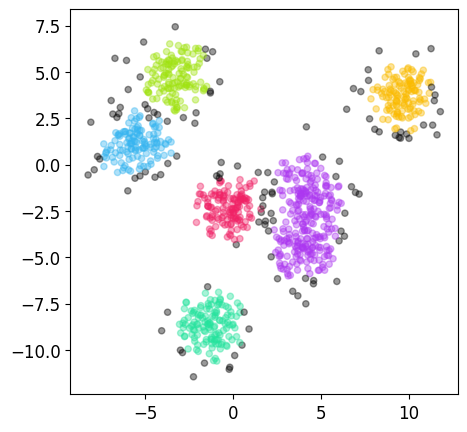

In [7]:
visualize_dbsc(db_mod = db, data = X, pals= pals)

Trong hình, những điểm thuộc về 1 cụm được tô cùng màu, riêng những giá trị nhiễu có màu đen, chúng phân bố ở ngoại vi của cụm.

# Giải quyết bài toán truy vết Covid

Ta đã hình dung ra được cách thức hoạt động của DBSCAN. Một cách tình cờ, thuật toán này rất phù hợp cho bài toán truy vết tự động mà ta cần giải quyết, vì sao ?

+ Từ 2 giá trị tọa độ Longitude và Latitude, có thể tính khoảng cách giữa 2 đối tượng bằng công thức Haversine:
https://en.wikipedia.org/wiki/Haversine_formula

+ 1 đối tượng được xem là có tiếp xúc nguy hiểm với đối tượng mục tiêu nếu bán kính tiếp xúc nhỏ hơn 2m, giá trị này tương đương với tham số bán kính phân cụm trong DBSCAN, thí dụ ta đặt ngưỡng là 0.0018;

+ Mục tiêu của bài toán là phát hiện bất kì đối tượng nào có nguy cơ lây nhiễm, do đó ta đặt tham số kích thước tối thiểu = 2 phần tử.

+ Tất cả những đối tượng được phân cụm cùng với mục tiêu sẽ được xem như có nguy cơ lây nhiễm.

+ Tất cả những đối tượng được phân loại là Nhiễu sẽ được xem là an toàn, không có nguy cơ lây nhiễm.

Bây giờ ta tải dữ liệu (cũng chỉ là mô phỏng):

In [1]:
from Covid_tracker import *

In [2]:
data = pd.read_excel("MOCK_DATA.xlsx")

data

,User,Date,Longitude,Latitude
0,Nguyễn Thị Bích Ngọc,2020-08-11,70.202205,20.231441
1,Bành Đức Dũng,2020-06-05,70.223873,20.206672
2,Bành Thị Thảo Trang,2021-05-11,70.233190,20.207228
3,Bùi Công Thanh,2020-08-29,70.244812,20.224577
4,Bùi Đặng Thanh Ly,2021-01-27,70.225842,20.202268
...,...,...,...,...
995,Vương Đình Phước,2020-09-10,70.226324,20.209247
996,Vương Hoàng Phú,2020-09-05,70.249894,20.229963
997,Vương Minh Tuấn,2020-12-29,70.229392,20.203041
998,Vương Trần Đức Anh,2021-01-22,70.234465,20.242672


Một vấn đề khó khăn của bài toán phân cụm này (nếu ta muốn dùng kỹ thuật phân cụm để giải quyết nó), đó là dữ liệu phân bố rất thưa, và hỗn loạn. Không thể dùng K-measn hay các thuật toán chỉ dựa duy nhất vào khoảng cách haversine để phân cụm. Trái lại, trong hoàn cảnh này DBSCAN trở nên rất phù hợp.

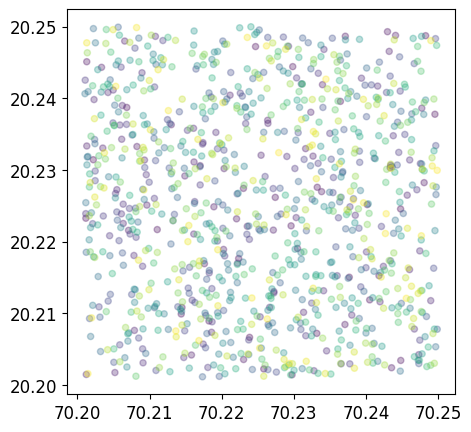

In [3]:
plt.rcParams.update({'font.size': 12})
    
fig = plt.figure(figsize = (5,5))
    
plt.scatter(data.Longitude,
            data.Latitude,
            alpha = 0.3,
            s = 20,
            c = data.index)

plt.show(fig)

Mã nguồn của class Covid_tracker trong module Covid_tracker mà Nhi vừa import bên trên, nội dung của nó như sau:

In [ ]:
from sklearn.cluster import DBSCAN

import matplotlib.pyplot as plt
import seaborn as sns

from typing import Dict, Set

from dataclasses import dataclass, field

@dataclass
class Covid_tracker:

    _data: pd.DataFrame = field(init = True)
    _dbmod: DBSCAN = DBSCAN(eps=0.0008288, 
                            min_samples=2,
                            metric='haversine')

    _clusters: Dict[str, Set[str]] = field(default_factory=dict)

    @property
    def data(self):
        return self._data
    
    @data.setter
    def data(self, data: pd.DataFrame) -> None:
        self._data = pd.concat([data, self._data])

    def tracking(self, targ:str=None) -> None:

        data = self._data.copy()
        self._dbmod.fit(self._data[["Latitude", "Longitude"]])
        data['Cluster'] = self._dbmod.labels_.tolist()

        if targ not in data['User'].unique():
            print(f"Không tìm thấy đối tượng {targ} trong dữ liệu")

        elif targ in self._clusters:
            print(self._clusters[targ])
        else:
            contacts = set()
            targ_clusters = set(data[data['User']==targ]['Cluster'])

            for i in targ_clusters:
                if i != -1:
                    contacts.update(set(data[data['Cluster']==i]['User']))
                    contacts.remove(targ)

            self._clusters[targ] = contacts
            print(contacts)

    def visualize(self):

        data =self._data.copy()
        data['Cluster'] = self._dbmod.labels_.tolist()
        
        plt.rcParams.update({'font.size': 12})
        fig = plt.figure(figsize = (7,7))
        
        g = sns.scatterplot(x=data['Longitude'], 
                        y=data['Latitude'], 
                        hue=data['Cluster'].astype(str))
        
        g.legend_.remove()

        plt.show(fig)

Chương trình này có tính năng cập nhật dữ liệu mới, vì data được xem như property, method setter sẽ ghép 1 dataframe mới và dữ liệu cũ và tạo ra 1 dữ liệu lớn hơn, đồng thời tự động cập nhật mô hình DBSCAN trên dữ liệu mới.

Thí dụ, Nhi cắt bộ dữ liệu data thành 2 phần:

In [4]:
data_1 = data.iloc[:500]
data_2 = data.iloc[500:]

Khởi tạo class Covid_tracker từ dữ liệu data_1:

Lúc này, bên trong object đã có sẵn một mô hình DBSCAN được khớp với dữ liệu data_1, ta có thể sử dụng ngay tính năng tracking:

In [5]:
tracker = Covid_tracker(data_1)

In [6]:
tracker._dbmod

DBSCAN(eps=0.0008288, metric='haversine', min_samples=2)

In [7]:
tracker.data

,User,Date,Longitude,Latitude
0,Nguyễn Thị Bích Ngọc,2020-08-11,70.202205,20.231441
1,Bành Đức Dũng,2020-06-05,70.223873,20.206672
2,Bành Thị Thảo Trang,2021-05-11,70.233190,20.207228
3,Bùi Công Thanh,2020-08-29,70.244812,20.224577
4,Bùi Đặng Thanh Ly,2021-01-27,70.225842,20.202268
...,...,...,...,...
495,Nguyễn Sỹ Long,2021-02-24,70.237790,20.219294
496,Nguyễn Sỹ Trọng,2020-12-05,70.209128,20.237598
497,Nguyễn Tâm An,2020-12-01,70.215000,20.232457
498,Nguyễn Tâm Đoan,2020-10-02,70.224369,20.239324


Thí dụ, ta phát hiện đối tượng Nguyễn Sỹ Trọng có xét nghiệm Covid dương tính, ta dùng method tracking để truy vết:

In [8]:
tracker.tracking('Nguyễn Sỹ Trọng')

{'Nguyễn Hồng Đức', 'Bùi Hoài An', 'Ngô Xuân Thái', 'Đinh Đức Cường'}


Kết quả tìm được 1 phân cụm gồm 4 người đã tiếp xúc với đối tượng mục tiêu.

Bây giờ ta cập nhật dữ liệu data_2, nó sẽ được ghép với data_1, và tạo ra một mô hình DBSCAN mới:

In [9]:
tracker.data = data_2

Ta thử dùng tracking lần nữa trên 1 đối tượng mục tiêu tên là Nguyễn Thành Vinh

In [11]:
tracker.tracking('Nguyễn Thành Vinh')

{'Võ Thị Nhẩn', 'Trần Thị Quỳnh Trang', 'Nguyễn Thị Linh', 'Đoàn Quốc Huy', 'Nguyễn Văn Thân', 'Lê Bảo Bình', 'Lê Nguyễn Xuân Sơn', 'Lê Tuấn Vinh', 'Nguyễn Quốc Bình', 'Nguyễn Thị Trà My', 'Hồ Diệu Linh', 'Hoàng Trung Thành', 'Nguyễn Đình Thế', 'Nguyễn Hoàng Châu', 'Hoàng Sỹ Mạnh', 'Nguyễn Quốc Kiệt', 'Đào Thị Tú Uyên', 'Hoàng Thị Vân', 'Hoàng Quốc Trường', 'Nguyễn Trọng Nghĩa', 'Nguyễn Võ Quang Nhật', 'Nguyễn Hoàng Quốc Khải', 'Nguyễn Tuấn Vũ', 'Tạ Thị Hoan', 'Nguyễn Minh Phương', 'Nguyễn Thanh Liên', 'Lê Minh Hậu', 'Lê Đức Minh', 'Phạm Thị Thùy Vy', 'Võ Thành Danh', 'Võ Thị Ngọc Trúc', 'Nguyễn Thị Bảo Trâm', 'Hoàng Văn Hiếu', 'Nguyễn Thị Anh Nguyệt', 'Ngô Vũ Đức Lộc', 'Lê Quốc Cường', 'Nguyễn Thị Ngọc Trâm', 'Trần Trí Nguyên', 'Lê Xuân Quang', 'Đỗ Hữu Xuân', 'Nguyễn Bá Tú', 'Nguyễn Minh Quân', 'Nguyễn Trọng Phúc', 'Thái Khắc Thạch', 'Trần Hoài Thương', 'Hồ Quang Huy', 'Nguyễn Hữu Cát Tường', 'Trương Kim Ngọc Hùng', 'Nguyễn Thị Mỹ Hiệp', 'Lê Minh Nghĩa', 'Nguyễn Anh Thư', 'Nguyễn Ngọc

Bên trong object tracker có field **_clusters**, ghi lại lịch sử tất cả những lượt truy vết

In [13]:
tracker._clusters['Nguyễn Sỹ Trọng']

{'Bùi Hoài An', 'Nguyễn Hồng Đức', 'Ngô Xuân Thái', 'Đinh Đức Cường'}

Method visualize cho phép vẽ hình :

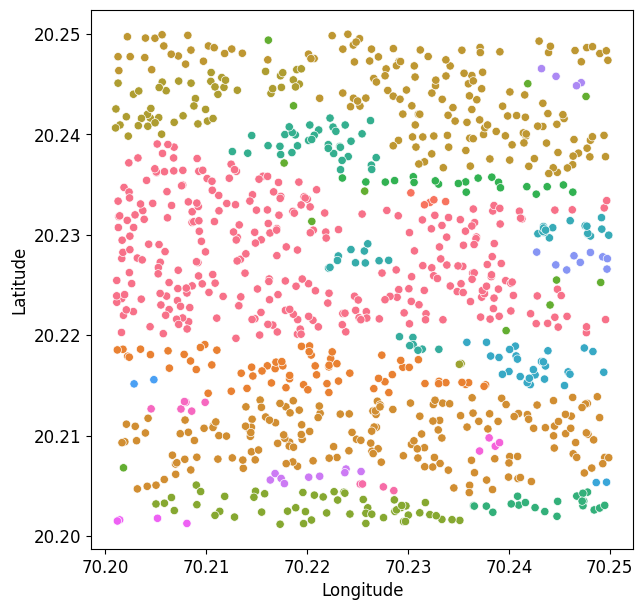

In [15]:
tracker.visualize()

# Tổng kết

Bài thực hành ngắn đến đây là hết. Thông điệp chính mà Nhi muốn chuyển cho các bạn là: Trong một số trường hợp, một thuật toán phân cụm nào đó có thể phù hợp một cách đáng ngạc nhiên như chìa khóa và ổ khóa cho một bài toán đặc biệt.

Chúc các bạn thực hành vui.